1.  Опишите  общую  схему  поиска  изображений,  включая  роль  дескрипторов 
изображений  и  методы  ранжирования  результатов.  Как  семантическое 
хеширование и алгоритм GIST используются для улучшения эффективности и 
точности  поиска?  В  чем  заключается  вклад  этих  технологий  в  улучшение 
доступа к большим коллекциям изображений? 
2.  Реализуйте алгоритм сшивания изображений для создания панорамы из серии 
фотографий. 
  


Извлечение признаков – представление изображения в числовом виде с помощью дескрипторов.
Индексирование – хранение и организация этих представлений для быстрого поиска.
Ранжирование результатов – сортировка изображений по степени сходства с запросом.

Дескрипторы – это числовые представления изображений, извлекаемые с помощью алгоритмов компьютерного зрения.

Глубокая нейросеть обучается так, чтобы похожие изображения получали близкие хеш-коды.
Поиск по хеш-кодам выполняется за O(1) операций, что намного быстрее, чем сравнение полных дескрипторов.

GIST:
Разделяет изображение на регионы.
Применяет фильтры для извлечения информации о текстуре и ориентации.
Формирует компактный вектор признаков (~512 значений).

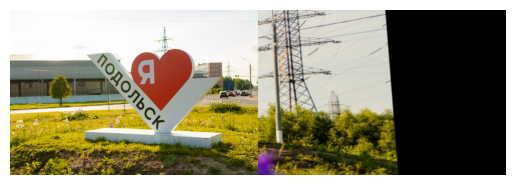

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread("data\RANSAC\RANSAC1.jpg")
image2 = cv2.imread("data\RANSAC\RANSAC2.jpg")

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

matcher = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
matches = matcher.knnMatch(des1, des2, k=2)
good = [m for m, n in matches if m.distance < 0.7 * n.distance]

if len(good) < 4:
    raise ValueError("Недостаточно совпадений")

src_pts = np.float32([kp1[m.queryIdx].pt for m in good])
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good])
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h1, w1 = image1.shape[:2]
h2, w2 = image2.shape[:2]
result = cv2.warpPerspective(image1, H, (w1 + w2, max(h1, h2)))
result[0:h2, 0:w2] = image2

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
